In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
wine = load_wine() #load_wine() funksiyasi orqali wine datasetini yuklaymiz va wine o'zgaruvchisiga saqlaymiz

print("Features:")
for i, name in enumerate(wine.feature_names):#wine.feature_names orqali datasetdagi xususiyatlar nomlarini olish va ularni raqamli tartibda chop etish
    print(f"{i+1}: {name}")#

Features:
0: alcohol
1: malic_acid
2: ash
3: alcalinity_of_ash
4: magnesium
5: total_phenols
6: flavanoids
7: nonflavanoid_phenols
8: proanthocyanins
9: color_intensity
10: hue
11: od280/od315_of_diluted_wines
12: proline


In [5]:
df = pd.DataFrame(wine.data, columns=wine.feature_names) #wine.data orqali datasetdagi ma'lumotlarni olish va ularni DataFrame formatida df o'zgaruvchisiga saqlash
df['wine_type'] = wine.target #wine.target orqali datasetdagi maqsadli o'zgaruvchini olish va uni 'wine_type' nomli ustunga saqlash
print('Shape:', df.shape)

print("\n ine types ", wine.target_names) #wine.target_names orqali datasetdagi maqsadli o'zgaruvchining nomlarini olish va ularni chop etish
df.head()

Shape: (178, 14)

 ine types  ['class_0' 'class_1' 'class_2']


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [6]:
df.describe()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,wine_type
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258,0.938202
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474,0.775035
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000,0.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000,0.000000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000,1.000000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000,2.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000,2.000000


In [8]:
X = df.drop('wine_type', axis=1) #maqsadli o'zgaruvchini 'wine_type' ustunidan ajratib olish va X o'zgaruvchisiga saqlash
y = df['wine_type'] #maqsadli o'zgaruvchini 'wine

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}")
print(f"Testing samples: {len(X_test)}")


Training samples: 142
Testing samples: 36


In [10]:
knn_no_scale = KNeighborsClassifier(n_neighbors=5) #KNN modelini yaratish va n_neighbors parametrini 3 ga o'rnatish
knn_no_scale.fit(X_train, y_train) #KNN modelini trening ma'lumotlari bilan o'qitish
acc_no_scale = knn_no_scale.score(X_test, y_test) #KNN modelining test ma'lumotlari bo'yicha aniqligini hisoblash
print(f"KNN  without scaling: {acc_no_scale:.2f}") #KNN

KNN  without scaling: 0.72


In [ ]:
scaler = StandardScaler() #StandardScaler obyektini yaratish
X_train_scaled = scaler.fit_transform(X_train) #Trening ma'lumotlarini o'qitish va ularni o'lchamlash
X_test_scaled = scaler.transform(X_test) #Test ma'lumotlarini o'lchamlash


In [ ]:
knn_scaled = KNeighborsClassifier(n_neighbors=5) #Yangi KNN modelini yaratish va n_neighbors parametrini 3
knn_scaled.fit(X_test_scaled, y_test)
acc_scaled = knn_scaled.score(X_test_scaled, y_test)
print(f"KNN without scalling : {acc_no_scale:.2%}")
print(f"KNN with scaling: {acc_scaled:.2%}")
print(f"\n difference :{(acc_scaled - acc_no_scale):.2%}")


KNN without scalling : 72.22%
KNN with scaling: 100.00%

 difference :27.78%


In [27]:
models = {
    'LogisticRegression' : LogisticRegression(max_iter=1000),
    'KNN' : KNeighborsClassifier(n_neighbors=5),
    'RandomForest' : RandomForestClassifier(n_estimators=100, random_state=42)
}
results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    accuracy = model.score(X_test_scaled, y_test)
    results[name] = accuracy
    print(f"{name} accuracy: {accuracy:.2%}")

LogisticRegression accuracy: 100.00%
KNN accuracy: 94.44%
RandomForest accuracy: 100.00%


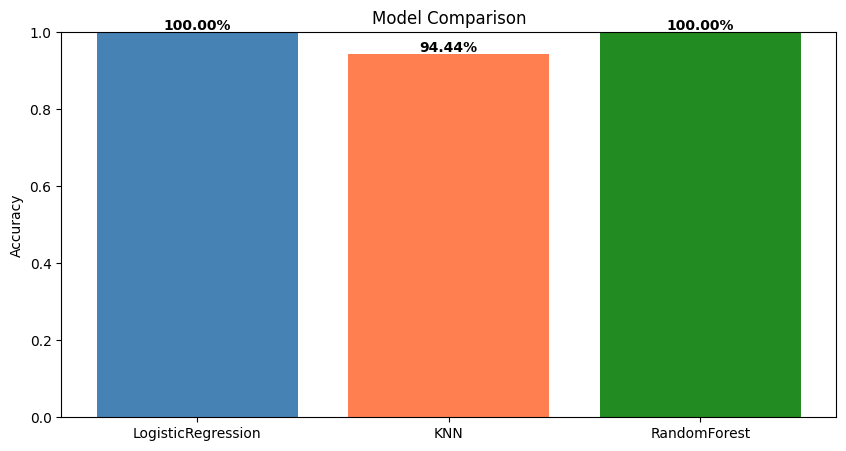

In [28]:
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values(), color=['steelblue', 'coral', 'forestgreen'])
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.ylim(0, 1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.005, f"{v:.2%}", ha='center', fontweight='bold')
plt.show()


In [30]:
from sklearn.metrics import classification_report

best_model = models['RandomForest']
y_pred = best_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred, target_names=wine.target_names))

              precision    recall  f1-score   support

     class_0       1.00      1.00      1.00        14
     class_1       1.00      1.00      1.00        14
     class_2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

